In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.models import Input, InputLayer
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers

In [72]:
data = pd.read_csv("/content/drive/My Drive/Fall 20/IOT Analytics/Neural Nets project/5.csv", header=None)
data.columns = ['x1', 'x2', 'x3', 'x4', 'x5','y']
print(data.head())
data.describe()

        x1      x2      x3      x4      x5        y
0   92.496  154.87  172.17  352.75  430.98   9823.9
1  107.180  173.19  149.53  336.61  435.60  10459.0
2   87.776  180.78  189.96  315.28  407.67   9369.0
3   61.104  177.72  150.79  299.28  384.61   7846.2
4   16.025  189.22  181.56  305.84  430.17   7599.5


,x1,x2,x3,x4,x5,y
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,77.525051,159.189647,173.982341,322.408904,401.632843,8873.421739
std,20.724126,20.588219,20.697149,20.637246,20.318110,873.056120
min,-0.650890,93.764000,96.975000,257.480000,327.330000,6418.700000
25%,63.790500,145.785000,160.037500,308.170000,387.915000,8252.925000
50%,77.319500,159.610000,173.970000,322.650000,401.650000,8786.200000
75%,91.196500,172.792500,187.572500,336.397500,415.332500,9381.350000
max,144.690000,227.420000,249.370000,392.830000,475.240000,12449.000000


### Scale values using Standard Scaler 


In [73]:
X = data[['x1','x2','x3', 'x4', 'x5']]
Y = data[['y']]
print(X.head())
print(Y.head())

        x1      x2      x3      x4      x5
0   92.496  154.87  172.17  352.75  430.98
1  107.180  173.19  149.53  336.61  435.60
2   87.776  180.78  189.96  315.28  407.67
3   61.104  177.72  150.79  299.28  384.61
4   16.025  189.22  181.56  305.84  430.17
         y
0   9823.9
1  10459.0
2   9369.0
3   7846.2
4   7599.5


In [74]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)
print("X shape: " , X.shape)
print("Y shape: ", Y.shape)
print("X: ", X[:5])
print("Y: ", Y[:5])

X shape:  (2300, 5)
Y shape:  (2300, 1)
X:  [[ 0.7225494  -0.20985719 -0.08758382  1.47053023  1.44469827]
 [ 1.43124966  0.68016557 -1.18169219  0.68827905  1.67213107]
 [ 0.494746    1.04890317  0.77214178 -0.34551387  0.29719641]
 [-0.7925363   0.90024216 -1.120801   -1.12097973 -0.83799848]
 [-2.96820361  1.45893549  0.36620052 -0.80303873  1.40482369]]
Y:  [[ 1.0889162 ]
 [ 1.81651904]
 [ 0.56775964]
 [-1.17683743]
 [-1.45946949]]


### Divide train set and test set

In [75]:
train_set_X = X[:2000]
train_set_Y = Y[:2000]
test_set_X = X[2000:]
test_set_Y = Y[2000:]

### Experiment with first layer of Neural Network

In [265]:
def layer_one_regression(units):
  model = Sequential()
  model.add(Input(shape=(5,)))
  # Layer 1
  model.add(Dense(units, kernel_initializer='normal',activation='relu'))
  model.add(Dense(1))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

estimator = KerasRegressor(build_fn=layer_one_regression, epochs=10)
layer1_units = np.arange(4,68,4)
layer1_units = layer1_units.tolist()
print(layer1_units)
param_grid = dict(units=layer1_units)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=-1,scoring='neg_mean_squared_error')
grid_result = grid.fit(train_set_X, train_set_Y)

[4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64]
Epoch 1/10
63/63 [==============================] - 0s 986us/step - loss: 0.5294
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0685
Epoch 3/10
63/63 [==============================] - 0s 889us/step - loss: 0.0144
Epoch 4/10
63/63 [==============================] - 0s 931us/step - loss: 0.0103
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 7/10
63/63 [==============================] - 0s 894us/step - loss: 0.0061
Epoch 8/10
63/63 [==============================] - 0s 957us/step - loss: 0.0054
Epoch 9/10
63/63 [==============================] - 0s 954us/step - loss: 0.0048
Epoch 10/10
63/63 [==============================] - 0s 951us/step - loss: 0.0043


In [266]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: -0.005429 using {'units': 64}


[-0.09070405 -0.02302395 -0.01328072 -0.01151546 -0.01062581 -0.00954826
 -0.00868282 -0.00754919 -0.00751221 -0.00711346 -0.00647577 -0.00600313
 -0.00596529 -0.00613495 -0.00569294 -0.00542907]
[{'units': 4}, {'units': 8}, {'units': 12}, {'units': 16}, {'units': 20}, {'units': 24}, {'units': 28}, {'units': 32}, {'units': 36}, {'units': 40}, {'units': 44}, {'units': 48}, {'units': 52}, {'units': 56}, {'units': 60}, {'units': 64}]


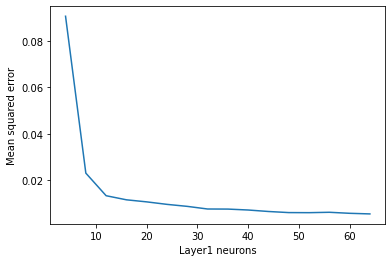

In [268]:
import matplotlib.pyplot as plt

print(grid_result.cv_results_['mean_test_score'])
print(grid_result.cv_results_['params'])
plt.xlabel("Layer1 neurons")
plt.ylabel("Mean squared error")
plt.plot(layer1_units,[-x for x in grid_result.cv_results_['mean_test_score']])
plt.savefig("/content/drive/My Drive/Fall 20/IOT Analytics/Neural Nets project/layer1.png")

### We can clearly see as we increase the number of units, the loss decreases, we have tested the first layer for range(4,64,4). We choose 4.

In [269]:
print(grid_result.best_params_)

{'units': 64}


In [270]:
def two_layer_regression(units):
  model = Sequential()
  model.add(Input(shape=(5,)))
  # Layer 1
  model.add(Dense(64, kernel_initializer='normal', activation='relu'))
  # Layer 2
  model.add(Dense(units, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

estimator = KerasRegressor(build_fn=two_layer_regression, epochs=10)
layer2_units = np.arange(4,132,4)
layer2_units = layer2_units.tolist()
print(layer2_units)
param_grid = dict(units=layer2_units)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=-1,scoring='neg_mean_squared_error')
grid_result = grid.fit(train_set_X, train_set_Y)

[4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128]
Epoch 1/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4331
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0015


[-0.08495861 -0.00280756 -0.00270418 -0.0023677  -0.00238177 -0.00229894
 -0.00210396 -0.00209908 -0.00211926 -0.00214316 -0.00170534 -0.00197703
 -0.00174741 -0.00170029 -0.00184406 -0.00177136 -0.00197734 -0.00173805
 -0.00164351 -0.00156157 -0.00150243 -0.00175087 -0.00165394 -0.00154356
 -0.0018506  -0.00169282 -0.00153601 -0.00156709 -0.00155183 -0.00162737
 -0.00165209 -0.00157977]
[{'units': 4}, {'units': 8}, {'units': 12}, {'units': 16}, {'units': 20}, {'units': 24}, {'units': 28}, {'units': 32}, {'units': 36}, {'units': 40}, {'units': 44}, {'units': 48}, {'units': 52}, {'units': 56}, {'units': 60}, {'units': 64}, {'units': 68}, {'units': 72}, {'units': 76}, {'units': 80}, {'units': 84}, {'units': 88}, {'units': 92}, {'units': 96}, {'units': 100}, {'units': 104}, {'units': 108}, {'units': 112}, {'units': 116}, {'units': 120}, {'units': 124}, {'units': 128}]


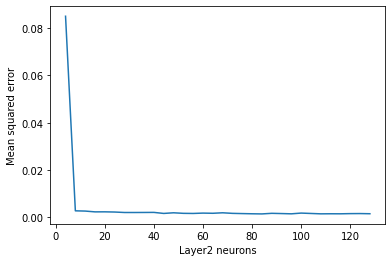

In [271]:
print(grid_result.cv_results_['mean_test_score'])
print(grid_result.cv_results_['params'])
plt.xlabel("Layer2 neurons")
plt.ylabel("Mean squared error")
plt.plot(layer2_units,[-x for x in grid_result.cv_results_['mean_test_score']])
plt.savefig("/content/drive/My Drive/Fall 20/IOT Analytics/Neural Nets project/layer2.png")

## Here we test layer 2 for range of (4,132,4) and we see that we get a elbow pretty quickly, so no need to have more neurons in the second layer as it doesnt result in peerformance enhancement.
## So we select 16 units for layer 2, as we get a elbow there


In [272]:
def three_layer_regression(units):
  model = Sequential()
  model.add(Input(shape=(5,)))
  # Layer 1
  model.add(Dense(64, kernel_initializer='normal', activation='relu'))
  # Layer 2
  model.add(Dense(16, kernel_initializer='normal', activation='relu'))
  # Layer4
  model.add(Dense(units, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

estimator = KerasRegressor(build_fn=three_layer_regression, epochs=10)
layer3_units = np.arange(4,132,4)
layer3_units = layer3_units.tolist()
print(layer3_units)
param_grid = dict(units=layer3_units)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=-1,scoring='neg_mean_squared_error')
grid_result = grid.fit(train_set_X, train_set_Y)

[4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128]
Epoch 1/10
63/63 [==============================] - 0s 1ms/step - loss: 0.5749
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0168
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 8.4339e-04
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 6.5282e-04


[-0.09015788 -0.00287665 -0.00232964 -0.00195602 -0.00213016 -0.00217848
 -0.00195908 -0.00174071 -0.00189657 -0.00186487 -0.00160803 -0.00166426
 -0.00165016 -0.00173239 -0.00135665 -0.00156489 -0.00130624 -0.00140504
 -0.00150458 -0.00155585 -0.00120141 -0.00137291 -0.00129475 -0.00137913
 -0.00128637 -0.00138529 -0.00133098 -0.00135598 -0.00140104 -0.00122418
 -0.00119005 -0.00133088]
[{'units': 4}, {'units': 8}, {'units': 12}, {'units': 16}, {'units': 20}, {'units': 24}, {'units': 28}, {'units': 32}, {'units': 36}, {'units': 40}, {'units': 44}, {'units': 48}, {'units': 52}, {'units': 56}, {'units': 60}, {'units': 64}, {'units': 68}, {'units': 72}, {'units': 76}, {'units': 80}, {'units': 84}, {'units': 88}, {'units': 92}, {'units': 96}, {'units': 100}, {'units': 104}, {'units': 108}, {'units': 112}, {'units': 116}, {'units': 120}, {'units': 124}, {'units': 128}]


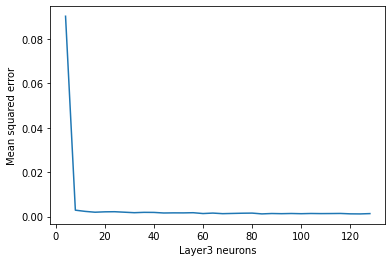

In [273]:
print(grid_result.cv_results_['mean_test_score'])
print(grid_result.cv_results_['params'])
plt.xlabel("Layer3 neurons")
plt.ylabel("Mean squared error")
plt.plot(layer3_units,[-x for x in grid_result.cv_results_['mean_test_score']])
plt.savefig("/content/drive/My Drive/Fall 20/IOT Analytics/Neural Nets project/layer3.png")

## Here we test layer 3 for range of (4,132,4) and we see that we get a elbow pretty quickly, so no need to have more neurons in the second layer as it doesnt result in peerformance enhancement.
## So we select 12 units for layer 3, as we get a elbow there


In [274]:
def four_layer_regression(units):
  model = Sequential()
  model.add(Input(shape=(5,)))
  # Layer 1
  model.add(Dense(64, kernel_initializer='normal', activation='relu'))
  # Layer 2
  model.add(Dense(16, kernel_initializer='normal', activation='relu'))
  # Layer 3
  model.add(Dense(12, kernel_initializer='normal', activation='relu'))
  # Layer 4
  model.add(Dense(units, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

estimator = KerasRegressor(build_fn=four_layer_regression, epochs=10)
layer4_units = np.arange(4,68,4)
layer4_units = layer4_units.tolist()
print(layer4_units)
param_grid = dict(units=layer4_units)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=-1,scoring='neg_mean_squared_error')
grid_result = grid.fit(train_set_X, train_set_Y)

[4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64]
Epoch 1/10
63/63 [==============================] - 0s 1ms/step - loss: 0.9243
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1095
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0017


[-0.3103902  -0.00325789 -0.00297024 -0.00203358 -0.00229627 -0.00281722
 -0.00227424 -0.00172721 -0.0020989  -0.00221252 -0.00202301 -0.00169402
 -0.00176899 -0.00192582 -0.00213216 -0.00158299]
[{'units': 4}, {'units': 8}, {'units': 12}, {'units': 16}, {'units': 20}, {'units': 24}, {'units': 28}, {'units': 32}, {'units': 36}, {'units': 40}, {'units': 44}, {'units': 48}, {'units': 52}, {'units': 56}, {'units': 60}, {'units': 64}]


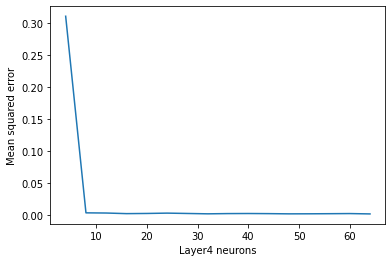

In [275]:
print(grid_result.cv_results_['mean_test_score'])
print(grid_result.cv_results_['params'])
plt.xlabel("Layer4 neurons")
plt.ylabel("Mean squared error")
plt.plot(layer4_units,[-x for x in grid_result.cv_results_['mean_test_score']])
plt.savefig("/content/drive/My Drive/Fall 20/IOT Analytics/Neural Nets project/layer4.png")

## As we can see, number of neurons converges at 8 for layer 4. This is indication we probably wont need more layers as the model is complex enough to capture the variance and pattern in the data

In [276]:
def four_layer_regression(units):
  model = Sequential()
  model.add(Input(shape=(5,)))
  # Layer 1
  model.add(Dense(64, kernel_initializer='normal', activation='relu'))
  # Layer 2
  model.add(Dense(16, kernel_initializer='normal', activation='relu'))
  # Layer 3
  model.add(Dense(12, kernel_initializer='normal', activation='relu'))
  # Layer 4
  model.add(Dense(8, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


In [279]:
from sklearn.metrics import mean_squared_error
test_loss = []
train_loss = []
#only layer 1 Model
y_predict =  layer_one_regression(64).predict(test_set_X)
test_loss.append(mean_squared_error(test_set_Y, y_predict))

y_predict =  layer_one_regression(64).predict(train_set_X)
train_loss.append(mean_squared_error(train_set_Y, y_predict))

# Model with 2 layers
y_predict =  two_layer_regression(16).predict(test_set_X)
test_loss.append(mean_squared_error(test_set_Y, y_predict))

y_predict =  two_layer_regression(16).predict(train_set_X)
train_loss.append(mean_squared_error(train_set_Y, y_predict))

# Model with 3 layers
y_predict =  three_layer_regression(12).predict(test_set_X)
test_loss.append(mean_squared_error(test_set_Y, y_predict))

y_predict =  three_layer_regression(12).predict(train_set_X)
train_loss.append(mean_squared_error(train_set_Y, y_predict))

#Model with 4 layers
y_predict =  four_layer_regression(8).predict(test_set_X)
test_loss.append(mean_squared_error(test_set_Y, y_predict))

y_predict =  four_layer_regression(8).predict(train_set_X)
train_loss.append(mean_squared_error(train_set_Y, y_predict))

print("Train Loss: " , train_loss)
print("test Loss: ", test_loss)

Train Loss:  [1.024748800136795, 1.016226168924038, 1.0299667550014884, 1.0296459285463853]
test Loss:  [0.8594815629743624, 0.7904888303509018, 0.8059437297629141, 0.8043283926510927]


## Compare above Neural networks, to decide which model is the best

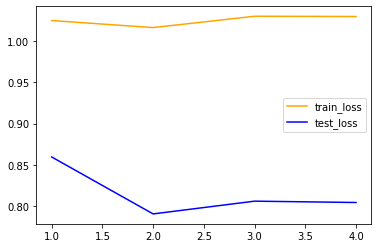

In [280]:
layers = [1,2,3,4]
plt.plot(layers, train_loss, label="train_loss", color="orange")
plt.plot(layers, test_loss, label="test_loss", color="blue")
plt.legend()
plt.savefig("/content/drive/My Drive/Fall 20/IOT Analytics/Neural Nets project/network_comparison.png")

We can from the above graph that the test loss does decrease with 2 layers, but the imporovement is very less as we increase the layers, thus we decide to have our final model with 2 layers

In [281]:
# Model Summary
ann_regressor().summary()

Model: "sequential_229"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_613 (Dense)            (None, 64)                384       
_________________________________________________________________
dense_614 (Dense)            (None, 16)                1040      
_________________________________________________________________
dense_615 (Dense)            (None, 1)                 17        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


## Testing with optimizers, Learning rate and Layer Regularization 

In [290]:
from tensorflow.keras import regularizers

def ann_regressor(lr,rg, opt):
  model = Sequential()
  model.add(Input(shape=(5,)))
  # Layer 1
  model.add(Dense(64, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l1(rg)))
  # Layer 2
  model.add(Dense(16, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l1(rg)))
  model.add(Dense(1))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer=opt(learning_rate=lr))
  return model

estimator = KerasRegressor(build_fn=ann_regressor, epochs=10)
learning_rate = np.arange(0.001, 0.1, 0.01)
learning_rate = learning_rate.tolist()
print("Learning rate List: " , learning_rate)
regularizer = [0.1,0.01, 0.001, 0.001, 0.0001]
optmizers= [keras.optimizers.Adam, keras.optimizers.SGD, keras.optimizers.RMSprop]
print("Optimizers: ", optmizers)
print("regularizer List: ", regularizer)
print(learning_rate)
param_grid = dict(lr=learning_rate, rg = regularizer, opt=optmizers)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=-1,scoring='neg_mean_squared_error')
grid_result = grid.fit(train_set_X, train_set_Y)

Learning rate List:  [0.001, 0.011, 0.020999999999999998, 0.030999999999999996, 0.040999999999999995, 0.05099999999999999, 0.06099999999999999, 0.071, 0.08099999999999999, 0.09099999999999998]
Optimizers:  [<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>]
regularizer List:  [0.1, 0.01, 0.001, 0.001, 0.0001]
[0.001, 0.011, 0.020999999999999998, 0.030999999999999996, 0.040999999999999995, 0.05099999999999999, 0.06099999999999999, 0.071, 0.08099999999999999, 0.09099999999999998]
Epoch 1/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1683
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 5/10
63/63 [==============================] - 0s 1ms/st

In [291]:
display(pd.DataFrame(grid_result.cv_results_['mean_test_score'],grid_result.cv_results_['params']))
print(pd.DataFrame(grid_result.cv_results_['mean_test_score'],grid_result.cv_results_['params']))

,0
"{'lr': 0.001, 'opt': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'rg': 0.1}",-1.029866
"{'lr': 0.001, 'opt': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'rg': 0.01}",-0.014571
"{'lr': 0.001, 'opt': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'rg': 0.001}",-0.005600
"{'lr': 0.001, 'opt': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'rg': 0.001}",-0.005308
"{'lr': 0.001, 'opt': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'rg': 0.0001}",-0.002682
...,...
"{'lr': 0.09099999999999998, 'opt': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>, 'rg': 0.1}",-0.181964
"{'lr': 0.09099999999999998, 'opt': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>, 'rg': 0.01}",-0.038729
"{'lr': 0.09099999999999998, 'opt': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>, 'rg': 0.001}",-0.035237
"{'lr': 0.09099999999999998, 'opt': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>, 'rg': 0.001}",-0.046412


                                                           0
{'lr': 0.001, 'opt': <class 'tensorflow.python.... -1.029866
{'lr': 0.001, 'opt': <class 'tensorflow.python.... -0.014571
{'lr': 0.001, 'opt': <class 'tensorflow.python.... -0.005600
{'lr': 0.001, 'opt': <class 'tensorflow.python.... -0.005308
{'lr': 0.001, 'opt': <class 'tensorflow.python.... -0.002682
...                                                      ...
{'lr': 0.09099999999999998, 'opt': <class 'tens... -0.181964
{'lr': 0.09099999999999998, 'opt': <class 'tens... -0.038729
{'lr': 0.09099999999999998, 'opt': <class 'tens... -0.035237
{'lr': 0.09099999999999998, 'opt': <class 'tens... -0.046412
{'lr': 0.09099999999999998, 'opt': <class 'tens... -0.058536

[150 rows x 1 columns]


In [292]:
print(grid_result.best_params_)

{'lr': 0.020999999999999998, 'opt': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'rg': 0.001}


# Lets experiment with number of epochs

In [293]:
def ann_regressor():
  model = Sequential()
  model.add(Input(shape=(5,)))
  # Layer 1
  model.add(Dense(64, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l1(0.001)))
  # Layer 2
  model.add(Dense(16, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l1(0.001)))
  model.add(Dense(1))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.02))
  return model

estimator = KerasRegressor(build_fn=ann_regressor)
epochs = np.arange(10,100,10).tolist()
param_grid = dict(nb_epoch=epochs)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=-1,scoring='neg_mean_squared_error')
grid_result = grid.fit(train_set_X, train_set_Y)


63/63 [==============================] - 0s 1ms/step - loss: 0.1920


In [294]:
display(pd.DataFrame([-x for x in grid_result.cv_results_['mean_test_score']],grid_result.cv_results_['params']))

,0
{'nb_epoch': 10},0.008706
{'nb_epoch': 20},0.010005
{'nb_epoch': 30},0.008081
{'nb_epoch': 40},0.009148
{'nb_epoch': 50},0.005879
{'nb_epoch': 60},0.006845
{'nb_epoch': 70},0.007324
{'nb_epoch': 80},0.006449
{'nb_epoch': 90},0.007685


In [295]:
print(grid_result.best_params_)


{'nb_epoch': 50}


In [254]:
def ann_regressor():
  model = Sequential()
  model.add(Input(shape=(5,)))
  # Layer 1
  model.add(Dense(64, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
  # Layer 2
  model.add(Dense(16, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
  model.add(Dense(1))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.03))
  return model

  



In [296]:
ann_model = ann_regressor()
ann_model.fit(train_set_X, train_set_Y, epochs=50)

Epoch 1/50
63/63 [==============================] - 0s 1ms/step - loss: 0.1274
Epoch 2/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 3/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0287
Epoch 4/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0232
Epoch 5/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 6/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 7/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0176
Epoch 8/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 9/50
63/63 [==============================] - 0s 998us/step - loss: 0.0154
Epoch 10/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 11/50
63/63 [==============================] - 0s 996us/step - loss: 0.0130
Epoch 12/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 13/50
63/63 [==========================

## Mean Squared Error for ANN Model

In [298]:
y_predict =  ann_model.predict(test_set_X)
print("Mean Squared Error for Test DataSet: ", mean_squared_error(test_set_Y, y_predict))

Mean Squared Error for Test DataSet:  0.008072435404396705


## Predict the same model using multivariable regression

In [299]:
def multivariable_regression():

  from sklearn.linear_model import LinearRegression
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import mean_squared_error

  data = pd.read_csv("/content/drive/My Drive/Fall 20/IOT Analytics/Neural Nets project/5.csv", header=None)
  data.columns = ['x1', 'x2', 'x3', 'x4', 'x5','y']

  X = data[['x1', 'x2', 'x3', 'x4', 'x5']]
  Y = data[['y']]
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  Y = scaler.fit_transform(Y)
  print("X shape: " , X.shape)
  print("Y shape: ", Y.shape)
  train_set_X = X[:2000]
  train_set_Y = Y[:2000]
  test_set_X = X[2000:]
  test_set_Y = Y[2000:]

  from sklearn.preprocessing import StandardScaler

  reg = LinearRegression().fit(train_set_X, train_set_Y)
  y_predict = reg.predict(test_set_X)
  print("regression Coefficients: " , reg.coef_)
  print("regression intercept: " , reg.intercept_)
  print("r**2 value(Regression score): ", reg.score(X,Y))
  print("Mean Squared Error for Test DataSet: ", mean_squared_error(test_set_Y, y_predict))



### Multivaribale Regression Scores, intercepts and Mean squared error on test dataset

In [300]:
multivariable_regression()

X shape:  (2300, 5)
Y shape:  (2300, 1)
regression Coefficients:  [[0.93991494 0.09039432 0.12019567 0.14235682 0.19749983]]
regression intercept:  [0.00232456]
r**2 value(Regression score):  0.9686213971459987
Mean Squared Error for Test DataSet:  0.022677513667044066


In [301]:
print("Percentage accuracy better for ANN Model: " , (0.022677513667044066-0.0026727450162044384)/0.022677513667044066)

Percentage accuracy better for ANN Model:  0.882141179344163


## Conclusion
### Artificial Neural Network performs 88% percent better than multivariable regression model
